In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
from scipy.optimize import curve_fit

In [3]:
dataframe = read_csv("T2_stern_01.csv", names=["Volt","Tau"])    
dataframe.drop(dataframe.index[[0,1,2]], inplace=True)
dataframe = dataframe.astype(float)

M0: 4.074552e+08
T2_star: 8.103886e-04


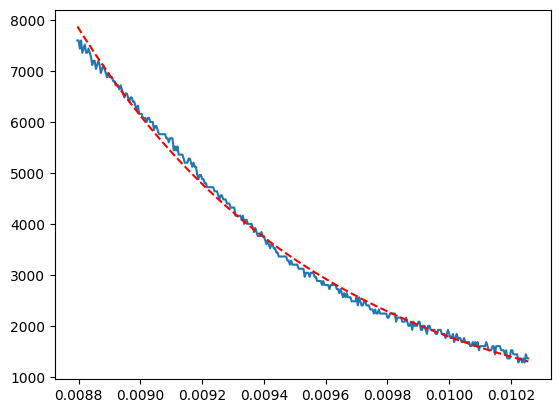

In [4]:
data = dataframe.values
x, y = data[:, 0], data[:, 1]

# Trim out noise and start from max + trim_front
trim_front = 130
trim_back = 1500

maxindex = np.where(y == max(y))[0][0]
x, y = x[maxindex+trim_front:-trim_back], y[maxindex+trim_front:-trim_back]

# define the true function
def T2_function(t, M0, T2_star):
	return M0 * np.exp(-t / T2_star)

# Do the fit
initialguess = 1e7, 0.001
(M0, T2_star ), _ = curve_fit(T2_function, x, y, initialguess)

# Plot result
x_fit_line = np.linspace(min(x), max(x), num=1000)
y_fit_line = T2_function(x_fit_line, M0, T2_star)
plt.plot(x,y)
plt.plot(x_fit_line, y_fit_line, '--', c='red')
print(f"M0: {M0:e}\nT2_star: {T2_star:e}")

# Finding T1

In [30]:
dataframe = read_csv("T1.csv", names=["Tau","VYellow", "VBlue"])    
dataframe.drop(dataframe.index[[0]], inplace=True)
dataframe = dataframe.astype(float)

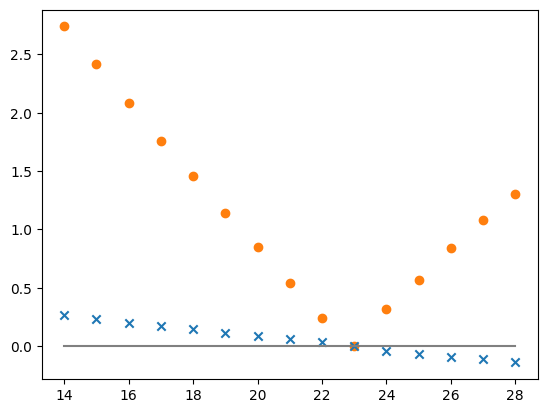

In [33]:
data = dataframe.values
x, yYellow, yBlue = data[:, 0], data[:, 1], data[:, 2]

plt.scatter(x, yYellow, color="C1", label="Channel 1")
plt.scatter(x, yBlue, marker='x', color="C0", label="Channel 2")
plt.plot([min(x),max(x)],[0,0], color="gray")